CM I. HW

Name: *Gergő KELLE*

NEPTUN Code: *GBBNUL*

**TOC:**
* [1. Position of the reference and the spatial configurations](#1)
* [2. Displacement vector](#2)
* [3. Deformation gradient](#3)
* [4. Green-Lagrange and Euler-Almansi strain tensor](#4)
* [5. Volume element dv/dV ratio and volume strain](#5)
* [6. Isochoric and volumetric parts of the deformation gradient](#6)
* [7. Principal stretches](#7)
* [8. Engineering strain of a line element](#8)
* [9. Surface element da/dA ratio](#9)
* [10. Angle of shear material line elements](#10)
* [11. Rigid body rotation](#11)
* [12. Hencky's strain tensor](#12)

# Position of the reference and the spatial configurations <a class="anchor" id="1"></a>

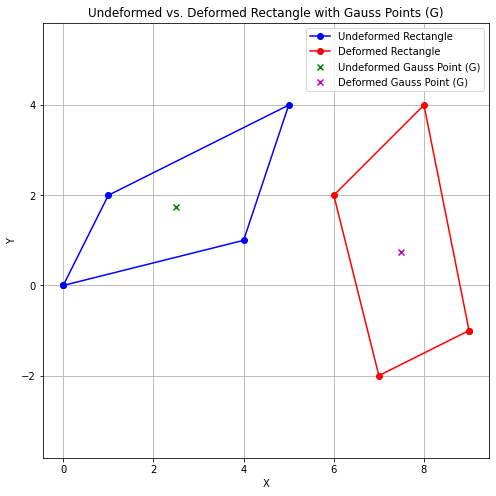

Undeformed Gauss Point (G_undef): (2.5, 1.75, 0.0)
Deformed Gauss Point (G_def): (7.5, 0.75, 0.0)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Coordinates of the undeformed rectangle
undeformed_rectangle = {
    'Point1': (0, 0, 0),
    'Point2': (4, 1, 0),
    'Point3': (5, 4, 0),
    'Point4': (1, 2, 0)
}

# Coordinates of the deformed rectangle
deformed_rectangle = {
    'Point1': (9, -1, 0),
    'Point2': (8, 4, 0),
    'Point3': (6, 2, 0),
    'Point4': (7, -2, 0)
}

# Extract coordinates to create vectors
undeformed_nodes = [undeformed_rectangle[point] for point in sorted(undeformed_rectangle.keys())]
deformed_nodes = [deformed_rectangle[point] for point in sorted(deformed_rectangle.keys())]

# Calculate the Gauss point for undeformed and deformed elements
def calculate_gauss_point(nodes):
    num_nodes = len(nodes)
    gx, gy, gz = 0, 0, 0
    for x, y, z in nodes:
        gx += x
        gy += y
        gz += z
    gx /= num_nodes
    gy /= num_nodes
    gz /= num_nodes
    return gx, gy, gz

undeformed_gauss_point = calculate_gauss_point(undeformed_nodes)
deformed_gauss_point = calculate_gauss_point(deformed_nodes)

# Extract x and y coordinates for plotting
undeformed_x, undeformed_y, _ = zip(*undeformed_nodes)
deformed_x, deformed_y, _ = zip(*deformed_nodes)

# Plot the undeformed and deformed rectangles
plt.figure(figsize=(8, 8))
plt.plot(undeformed_x + (undeformed_x[0],), undeformed_y + (undeformed_y[0],), marker='o', label='Undeformed Rectangle', linestyle='-', color='b')
plt.plot(deformed_x + (deformed_x[0],), deformed_y + (deformed_y[0],), marker='o', label='Deformed Rectangle', linestyle='-', color='r')
plt.scatter(undeformed_gauss_point[0], undeformed_gauss_point[1], marker='x', color='g', label='Undeformed Gauss Point (G)')
plt.scatter(deformed_gauss_point[0], deformed_gauss_point[1], marker='x', color='m', label='Deformed Gauss Point (G)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Undeformed vs. Deformed Rectangle with Gauss Points (G)')
plt.legend()
plt.grid(True)
plt.axhline
plt.axvline
plt.axis('equal')
plt.show()

# Print the Gauss points
print("Undeformed Gauss Point (G_undef):", undeformed_gauss_point)
print("Deformed Gauss Point (G_def):", deformed_gauss_point)


## **2. Displacement vector** <a class="anchor" id="2"></a>

In [39]:
# Calculate the displacement vector
displacement_vector = (
    deformed_gauss_point[0] - undeformed_gauss_point[0],
    deformed_gauss_point[1] - undeformed_gauss_point[1],
    deformed_gauss_point[2] - undeformed_gauss_point[2]
)
print("displacement vector of G point (U_G)",'\n', displacement_vector)

displacement vector of G point (U_G) 
 (5.0, -1.0, 0.0)


In [40]:
# Extract coordinates to create vectors
undeformed_nodes = np.array([undeformed_rectangle[point] for point in sorted(undeformed_rectangle.keys())])
deformed_nodes = np.array([deformed_rectangle[point] for point in sorted(deformed_rectangle.keys())])

# Calculate the displacement matrix
displacement_matrix = deformed_nodes - undeformed_nodes

# Print the displacement matrix
print("Displacement Matrix (4x3):")
print(displacement_matrix)

Displacement Matrix (4x3):
[[ 9 -1  0]
 [ 4  3  0]
 [ 1 -2  0]
 [ 6 -4  0]]


## **3. Deformation gradient** <a class="anchor" id="3"></a>

*Due to python's poor symbolic tools or perhabs my level of knowledge about this programming language I've calculated the Deformation gradient in Wolfram Mathematica which is a better, symbolic solvers.*

*The code was the following:*

ClearAll;
X0 = {{0, 0}, {4, 1}, {5, 4}, {1, 2}};
U = {{9, -1}, {4, 3}, {1, -2}, {6, -4}};
Xt = X0 + U

parameters =  {\[Xi] -> 0, \[Eta] -> 0};

NN = 1/4 {(1 - \[Xi]) (1 - \[Eta]), (1 + \[Xi]) (1 - \[Eta]), (1 + \[Xi]) (1 + \[Eta]), (1 - \[Xi]) (1 + \[Eta])};

XS0 = {Total[(X0[[All, 1]]*NN)], Total[(X0[[All, 2]]*NN)]}

XS1 = {Total[(Xt[[All, 1]]*NN)], Total[(Xt[[All, 2]]*NN)]}

N[XS0 /. {\[Xi] -> 0, \[Eta] -> 0}]

N[XS1 /. {\[Xi] -> 0, \[Eta] -> 0}]

ux = Expand[U[[All, 1]] . NN]

uy = Expand[U[[All, 2]] . NN]

Expand[4 ux]

Expand[4 uy]

x = Simplify[X0[[All, 1]] . NN]

y = Simplify[X0[[All, 2]] . NN]

Expand[4 x]

Expand[4 y]

sol = FullSimplify[Solve[{x == XX, y == YY}, {\[Xi], \[Eta]}]]

N[sol /. {XX -> XS0[[1]], YY -> XS0[[2]]}];

UXY = FullSimplify[{ux, uy} /. (sol[[2]])]

KK = FullSimplify[Grad[UXY, {XX, YY}]];

KK = {{KK[[1, 1]], KK[[1, 2]], 0}, {KK[[2, 1]], KK[[2, 2]], 0}, {0, 0, 0}};

MatrixForm[KK]

MatrixForm[Expand[KK]]

F = Simplify[KK + IdentityMatrix[3]]

F // MatrixForm

{XX, YY} = N[XS0 /. {\[Xi] -> 0, \[Eta] -> 0}];

F // MatrixForm

The result of the Wolfram Mathematica code presented above:



$$\textbf{F} = \begin{bmatrix}
 0.0588235 & -0.823529 & 0 \\
 1.58824 & -1.23529 & 0 \\
 0 & 0 & 1 \\
\end{bmatrix}$$

In [41]:
F_X_G = sp.Matrix([[0.05882, -0.8235, 0], [1.588, -1.235, 0], [0, 0, 1]])

## **4. Green-Lagrange and Euler-Almansi strain tensor** <a class="anchor" id="4"></a>

In [42]:
# Cauchy-Green deformation tensor
C_G = F_X_G.transpose()*F_X_G
print(C_G)

Matrix([[2.52520379240000, -2.00961827000000, 0], [-2.00961827000000, 2.20337725000000, 0], [0, 0, 1]])


In [43]:
# Green-Lagrange strain tensor
GL_strain = 1/2*(C_G - sp.eye(3))
GL_strain

Matrix([
[0.7626018962, -1.004809135, 0],
[-1.004809135,  0.601688625, 0],
[           0,            0, 0]])

In [44]:
# Cauchy deformation tensor
cauchy_d = F_X_G.transpose().inv()* F_X_G.inv()
cauchy_d

Matrix([
[  2.65303515500699, -0.727953753069842, 0],
[-0.727953753069842,  0.446838290721603, 0],
[                 0,                  0, 1]])

In [45]:
#Euler-Almansi strain tensor
EA_strain = 1/2*(sp.eye(3)-cauchy_d)
EA_strain

Matrix([
[-0.826517577503495, 0.363976876534921, 0],
[ 0.363976876534921, 0.276580854639198, 0],
[                 0,                 0, 0]])

## **5. Volume ratio, volumetric strain** <a class="anchor" id="5"></a>

In [46]:
#Volume ratio
J = sp.det(F_X_G)
J

1.23507530000000

In [47]:
#volumetric strain
eps_v= J -1
eps_v

0.235075300000000

## **6. Isochoric and volumetric parts of the deformation gradient** <a class="anchor" id="6"></a>

In [48]:
F_iso = 1/ J**(1/3) * F_X_G
F_vol = J**(1/3) * sp.eye(3)
print("F_ISO: ", F_iso, '\n', "F_VOL: ", F_vol)
F_iso*F_vol-F_X_G
#must be 0 matrix

F_ISO:  Matrix([[0.0548227152446906, -0.767536654267302, 0], [1.48008282571521, -1.15107197088053, 0], [0, 0, 0.932042081684641]]) 
 F_VOL:  Matrix([[1.07291292920222, 0, 0], [0, 1.07291292920222, 0], [0, 0, 1.07291292920222]])


Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

## **7. Principal stretches** <a class="anchor" id="7"></a>

In [49]:
eigenvalues2= C_G.eigenvals()
eigenvalues2

{4.38034078643797: 1, 0.348240255962033: 1, 1.00000000000000: 1}

In [50]:
# Extract eigenvalues and store them in value1, value2, and value3
eigenvalue_list = list(eigenvalues2)
value1, value2, value3 = eigenvalue_list[:3]  # Assuming there are exactly three eigenvalues
lambda1 = value1**(1/2)
lambda2 = value3**(1/2)
lambda3 = value2**(1/2)

# Print the values
print("lambda1:", lambda1)
print("lambda2:", lambda2)
print("lambda3:", lambda3)

lambda1: 2.09292636909137
lambda2: 1.00000000000000
lambda3: 0.590118849014360


## **8. Engineering strain of a line element** <a class="anchor" id="8"></a>

In [51]:
def length(x): 
    return np.sqrt(sum(i**2 for i in x))

L = length(undeformed_nodes[1]- undeformed_nodes[3])
l = length(deformed_nodes[1]- deformed_nodes[3])
dL = l - L
eps_eng = l/L-1
print("Undeformed line length: ", L, " mm", '\n',
        "Deformed line length: ", l, " mm", '\n',
        "The line element length changed with: ", dL, " mm", '\n',
         "Engineering strain of the line element: ", eps_eng)

Undeformed line length:  3.1622776601683795  mm 
 Deformed line length:  6.082762530298219  mm 
 The line element length changed with:  2.92048487012984  mm 
 Engineering strain of the line element:  0.9235384061671343


## **9. Surface element da/dA ratio** <a class="anchor" id="9"></a>

In [52]:
No_1 = sp.Matrix([[1],
                 [0],
                 [0]])
No_2 = sp.Matrix([[0],
                 [1],
                 [0]])
No_3 = sp.Matrix([[0],
                 [0],
                 [1]])

AA = F_X_G.inv() * F_X_G.transpose().inv()
sp.det(F_X_G) * (No_3.T*AA*No_3)**(1/2)

Matrix([[1.2350753]])

## **10. Angle of shear material line elements** <a class="anchor" id="10"></a>

In [53]:
lamndba_N1 = (No_1.T*C_G*No_1)**(1/2)
lamndba_N1_value = lamndba_N1[0]
lamndba_N2 = (No_2.T*C_G*No_2)**(1/2)
lamndba_N2_value = lamndba_N2[0]
print("Lambda_N1: ", lamndba_N1_value)
print("Lambda_N2: ", lamndba_N2_value)

Lambda_N1:  1.58908898190127
Lambda_N2:  1.48437773157643


In [54]:
tmp = No_1.T*C_G*No_2
tmp_value = tmp[0]

import math as m
rad = m.pi/2 - m.acos((tmp_value)/(lamndba_N1_value* lamndba_N2_value))
deg = rad*180 / m.pi
print(rad,"rad", '\n',deg, "°")

-1.019723676858753 rad 
 -58.42586295356872 °


## **11. Rigid body rotation** <a class="anchor" id="11"></a>

In [55]:
UU = (C_G)**(1/2)
UU

Matrix([
[  1.40149672731003, -0.749006485779179,   0],
[-0.749006485779179,    1.2815484907957,   0],
[                 0,                  0, 1.0]])

In [56]:
R = F_X_G * UU.inv()
R

Matrix([
[-0.438375019572127, -0.898792157406337,   0],
[ 0.898792157406337, -0.438375019572127,   0],
[                 0,                  0, 1.0]])

In [57]:
theta_rad = m.acos((np.trace(R) - 1) /2)
theta_deg = theta_rad *180 / m.pi
print(theta_rad,"rad", '\n',theta_deg, "°")

2.0245862411838864 rad 
 116.00024688009206 °


In [58]:
NN = (R - R.transpose())/(2*m.sin(theta_rad))
NN

Matrix([
[  0, -1.0, 0],
[1.0,    0, 0],
[  0,    0, 0]])

## **12. Hencky's strain tensor** <a class="anchor" id="12"></a>

In [59]:
V = F_X_G * R.transpose()
V

Matrix([
[0.714370122972886, 0.413868783316287,   0],
[0.413868783316288,  1.96867509513284,   0],
[                0,                 0, 1.0]])

In [60]:
import scipy.linalg
V = np.dot(F_X_G, R.transpose())
VV = np.array(V).astype(float)
scipy.linalg.logm(VV)

array([[-0.42275961,  0.3486512 ,  0.        ],
       [ 0.3486512 ,  0.63389155,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])